# generate dataset

In [1]:
from scripts.get_top_stocks import *


top_stocks_long, top_stocks_long_short = generate_top_stocks_df()
common_top_stocks = get_common_top_stocks(top_stocks_long, top_stocks_long_short)

/Users/I748920/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



Results saved to 'top_30_stocks_long_only.csv' and 'top_30_stocks_long_short.csv'

Detailed metrics for top stock (Long-Only Strategy) SMCI:
Final Close Price: 284.26
60-day Return: 250.61%
Average Hourly Volatility: 0.6678
Average Sharpe Ratio: 1.6242
Average Hourly Volume: 355714

num common_top_stocks:  35


In [2]:
# specify variables for dataset generation

start_date = '2023-01-01'
end_date = '2024-08-01'
interval = "1h"
trading_days_per_year = 252
hours_per_day = 6.5

In [3]:
from scripts.generate_dataset_features import *


df = get_all_stock_features_df(
    stocks_list=common_top_stocks,
    start_date=start_date,
    end_date=end_date,
    interval=interval,
    trading_days_per_year=trading_days_per_year, 
    hours_per_day=hours_per_day
)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [4]:
def categorize_by_percentile(values,percentile_list):
    # Compute percentiles
    # percentiles = np.percentile(values, [20, 40, 60, 80])
    # percentiles = np.percentile(values, [33,66])
    percentiles = np.percentile(values, percentile_list)
    # percentiles = np.percentile(values, [10,90])
    
    # Define labels
    labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
    # labels = ['sell', 'hold', 'buy']

    # Use pd.cut to bin the values
    categories = pd.cut(values, bins=[-np.inf] + percentiles.tolist() + [np.inf], labels=labels, include_lowest=True)

    # could potentially have issue where 
    
    return categories

In [5]:
def add_target_cols(df):
    new_df = pd.DataFrame()
    
    for stock_name in df.stock_name.unique():
        stock_df = df[df['stock_name']==stock_name]
        stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),[20,40,60,80])
        
        # label_mapping = {
        #     'sell': 0, 
        #     'hold': 1, 
        #     'buy': 2, 
        # }
        label_mapping = {
            'strong sell': 0, 
            'sell': 1, 
            'hold': 2, 
            'buy': 3, 
            'strong buy': 4, 
        }
        
        stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
        new_df = pd.concat([new_df,stock_df],ignore_index=True)
    
    return new_df

In [6]:
df = add_target_cols(df)

/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_48226/1416374192.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Stock_Position"] = categorize_by_percentile(stock_df["Log_Return_shift"].to_numpy(),[20,40,60,80])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_48226/1416374192.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_df["Target"] = stock_df["Stock_Position"].apply(lambda x:label_mapping[x])
/var/folders/ff/wvby4kh52j96myw15h33jjk40000gn/T/ipykernel_48226/

In [9]:
df

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-24 13:30:00-05:00,164.369995,165.000000,162.850494,162.949997,162.949997,131396,-0.009224,-0.115974,-0.075617,...,1.755802,0.895983,0.498025,-0.433388,-1.503541,-1.09,0.000981,TEAM,hold,2
1,2023-02-24 14:30:00-05:00,162.964996,163.750000,162.160004,163.110001,163.110001,262679,0.000981,0.169209,0.333142,...,3.726396,1.300757,0.624379,-0.447150,-1.567759,-1.09,-0.003501,TEAM,sell,1
2,2023-02-24 15:30:00-05:00,163.080002,163.149994,161.750107,162.539993,162.539993,454763,-0.003501,0.202875,0.267735,...,2.593997,1.255071,0.624312,-0.397994,-1.470768,-1.09,0.028207,TEAM,strong buy,4
3,2023-02-27 09:30:00-05:00,164.589996,168.209900,162.160004,167.190002,167.190002,297752,0.028207,-0.082492,-0.208648,...,-0.426979,-0.783657,-1.473481,-3.827985,-4.266002,0.31,-0.007143,TEAM,strong sell,0
4,2023-02-27 10:30:00-05:00,167.110001,167.341797,164.320007,166.000000,166.000000,237080,-0.007143,-0.109483,-0.113441,...,-1.052037,-1.879980,-14.972443,-1.208864,-2.954869,0.31,0.001986,TEAM,buy,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89829,2024-07-30 10:30:00-04:00,105.900002,106.000000,103.500000,104.730003,104.730003,3711493,-0.010826,0.037675,-0.074435,...,0.633051,0.689845,1.054391,1.002187,0.406690,0.68,-0.007668,MU,strong sell,0
89830,2024-07-30 11:30:00-04:00,104.724998,104.750000,103.419998,103.930000,103.930000,2283530,-0.007668,-0.158797,-0.238191,...,0.832498,0.708844,0.971671,0.924183,0.389755,0.68,-0.007922,MU,strong sell,0
89831,2024-07-30 12:30:00-04:00,103.870003,103.879997,102.169998,103.109901,103.109901,3005460,-0.007922,0.033334,0.136497,...,1.010523,0.731527,0.908811,0.859649,0.374483,0.68,0.007826,MU,strong buy,4
89832,2024-07-30 13:30:00-04:00,103.071098,104.070000,102.940002,103.919998,103.919998,2017796,0.007826,-0.128269,-0.196618,...,4.539734,1.431240,1.318580,1.077183,0.431512,0.68,-0.005984,MU,strong sell,0


In [10]:
# additional logic to ensure buy remains +ve and sell remainvs -ve

print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'buy')]))
# print(len(df[(df.Log_Return_shift < 0) & (df.Stock_Position == 'strong buy')]))

print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'sell')]))
# print(len(df[(df.Log_Return_shift > 0) & (df.Stock_Position == 'strong sell')]))

# all good

0
0


# preprocess dataset

- set targets correctly (try 3 targets first)
    - plot the distribution pdf of the target values
      
- split train val test on time
    - within each split can shuffle
    - split directly on the df

- shortlist the target and features
** keep the df unchanged so dont need to run above code again

In [11]:
# sort df according to date
df1 = df.sort_values("Datetime").reset_index(drop=True)

# train test split on index
train_size, val_size, test_size = 0.8, 0.1, 0.1
train_size, val_size, test_size = int(len(df1) * train_size), int(len(df1) * val_size), int(len(df1) * test_size)
train_df = df1.iloc[:train_size]
val_df = df1.iloc[train_size:train_size + val_size]
test_df = df1.iloc[train_size + val_size:]

train_df.shape,val_df.shape,test_df.shape

((71867, 84), (8983, 84), (8984, 84))

In [12]:
train_df.head()

,Datetime,Open,High,Low,Close,Adj Close,Volume,Log_Return,EMAVolumeDiff2,SMAVolumeDiff2,...,MACD16,MACD32,MACD64,MACD128,MACD256,FamaFrenchMktReturns,Log_Return_shift,stock_name,Stock_Position,Target
0,2023-02-10 12:00:00+00:00,153.437500,153.699997,153.000000,153.085007,153.085007,210932,-0.003243,-0.317099,-0.373950,...,1.165333,0.300798,-0.237521,-0.690568,-1.679347,0.11,0.001730,MKS.L,buy,3
1,2023-02-10 12:00:00+00:00,1619.500000,1625.500000,1615.000000,1625.000000,1625.000000,38967,0.003390,-0.156986,-0.213034,...,29.033343,-0.033365,-1.200842,-4.101547,45.477088,0.11,0.001537,III.L,buy,3
2,2023-02-10 12:00:00+00:00,106.360001,106.639999,106.199997,106.269997,106.269997,1318353,-0.000658,-0.007519,0.045017,...,1.028772,0.136904,-0.029851,-0.186527,-0.638538,0.11,0.004600,RR.L,strong buy,4
3,2023-02-10 13:00:00+00:00,1625.500000,1631.000000,1617.982788,1627.500000,1627.500000,49544,0.001537,0.022851,0.119499,...,-2.899139,0.099350,-1.730039,-5.791475,21.748935,0.11,-0.001537,III.L,sell,1
4,2023-02-10 13:00:00+00:00,106.260002,106.980003,106.129997,106.760002,106.760002,859007,0.004600,-0.154064,-0.210965,...,11.923219,0.395658,-0.006902,-0.241713,-0.861859,0.11,0.005232,RR.L,strong buy,4


In [13]:
df.columns, df.columns[8:-4]

(Index(['Datetime', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
        'Log_Return', 'EMAVolumeDiff2', 'SMAVolumeDiff2', 'EMACloseDiff2',
        'SMACloseDiff2', 'VWAP2', 'VolatilityStdDev2', 'Volatility2',
        'Momentum2', 'EMAVolumeDiff4', 'SMAVolumeDiff4', 'EMACloseDiff4',
        'SMACloseDiff4', 'VWAP4', 'VolatilityStdDev4', 'Volatility4',
        'Momentum4', 'EMAVolumeDiff8', 'SMAVolumeDiff8', 'EMACloseDiff8',
        'SMACloseDiff8', 'VWAP8', 'VolatilityStdDev8', 'Volatility8',
        'Momentum8', 'EMAVolumeDiff16', 'SMAVolumeDiff16', 'EMACloseDiff16',
        'SMACloseDiff16', 'VWAP16', 'VolatilityStdDev16', 'Volatility16',
        'Momentum16', 'EMAVolumeDiff32', 'SMAVolumeDiff32', 'EMACloseDiff32',
        'SMACloseDiff32', 'VWAP32', 'VolatilityStdDev32', 'Volatility32',
        'Momentum32', 'EMAVolumeDiff64', 'SMAVolumeDiff64', 'EMACloseDiff64',
        'SMACloseDiff64', 'VWAP64', 'VolatilityStdDev64', 'Volatility64',
        'Momentum64', 'EMAVolumeDiff1

# training mtd 1 - using all features

In [15]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [16]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2, 3, 4}, {0, 1, 2, 3, 4}, {0, 1, 2, 3, 4})

In [17]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [18]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [19]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0 14326]
 [    1 14374]
 [    2 14262]
 [    3 14346]
 [    4 14559]]
(72795, 72) (72795,)
[[    0 14559]
 [    1 14559]
 [    2 14559]
 [    3 14559]
 [    4 14559]]


In [20]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 1731]
 [   1 1839]
 [   2 1947]
 [   3 1764]
 [   4 1702]]
(9735, 72) (9735,)
[[   0 1947]
 [   1 1947]
 [   2 1947]
 [   3 1947]
 [   4 1947]]


In [21]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [22]:
from scripts.train_predict import *

# standardise the values

scaler = StandardScaler()

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((72795, 72), (72795,), (9735, 72), (9735,), (8984, 72), (8984,))

In [23]:
X_train[100],y_train[100]

(array([ 2.50615861e+00,  3.41929275e+00, -1.93726242e-01, -3.94179511e-01,
        -3.25513229e-02,  8.71369142e-01,  1.15151054e-02,  4.71770809e-01,
         3.14016482e+00,  2.22119743e+00, -1.04241922e-03,  1.85040004e-02,
         4.43399516e-02,  8.80153077e-01, -4.01517970e-01,  5.10820089e-01,
         2.56296168e+00,  2.37249401e+00,  1.29414213e-01,  1.49432329e-01,
         7.09663619e-02,  6.40365190e-01, -7.37780010e-01,  5.35153567e-01,
         2.38215691e+00,  2.27314935e+00,  2.00041624e-01,  2.18787102e-01,
         1.47601413e-01,  5.99326207e-01, -9.01021120e-01,  5.51121590e-01,
         2.30310583e+00,  2.18445756e+00,  2.18069362e-01,  2.48097810e-01,
         4.88731810e-01,  8.00998744e-01, -1.09308590e+00,  5.57652402e-01,
         2.26407761e+00,  2.17149465e+00,  2.18147618e-01,  1.69351321e-01,
         2.44469862e-01,  4.13360281e-01, -1.17991774e+00,  5.41071857e-01,
         2.24950910e+00,  2.17952668e+00,  3.43326582e-01,  1.40617012e-01,
         2.4

In [24]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [25]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.2514638
|████████████████████████████████████████| 1/1 [100%] in 43.8s (0.02/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.25146


accuracy: 23.8


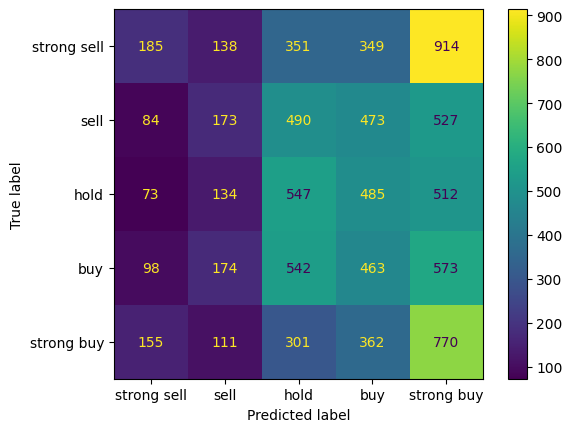

In [55]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
# labels = ['sell', 'hold', 'buy']
labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [57]:
## predict on indiv stocks
## using all features

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()


    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

SNPS: 16.87
MRNA: 22.09
BKNG: 18.47
ABNB: 19.28
INTU: 22.09
CDNS: 20.88
TEAM: 21.29
CRWD: 20.97
MSFT: 21.37
PANW: 21.77
MELI: 22.18
TTD: 19.35
MDB: 20.56
NVDA: 19.35
META: 17.74
AMAT: 15.32
AMD: 16.94
DASH: 16.94
AMZN: 19.35
CPRT: 20.16
PDD: 23.79
AVGO: 20.97
INTC: 22.18
LRCX: 18.55
MU: 16.94
WDAY: 18.55
DDOG: 20.97
ZS: 21.37
ADBE: 23.39
MRVL: 17.34
SMCI: 18.95
TSLA: 16.94
III.L: 19.31
MKS.L: 17.87
RR.L: 17.29


# training mtd 2 - using SelectKBest(10)

In [59]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [60]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2, 3, 4}, {0, 1, 2, 3, 4}, {0, 1, 2, 3, 4})

In [61]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [62]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [63]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0 14326]
 [    1 14374]
 [    2 14262]
 [    3 14346]
 [    4 14559]]
(72795, 72) (72795,)
[[    0 14559]
 [    1 14559]
 [    2 14559]
 [    3 14559]
 [    4 14559]]


In [64]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 1731]
 [   1 1839]
 [   2 1947]
 [   3 1764]
 [   4 1702]]
(9735, 72) (9735,)
[[   0 1947]
 [   1 1947]
 [   2 1947]
 [   3 1947]
 [   4 1947]]


In [65]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [66]:
from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
selector = SelectKBest(f_regression, k=10)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = selector.fit_transform(X_train, y_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = selector.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = selector.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((72795, 10), (72795,), (9735, 10), (9735,), (8984, 10), (8984,))

In [67]:
X_train[0],y_train[0]

(array([-0.49472755, -0.18339175, -0.17517875,  0.47115161, -0.57123718,
        -0.81822442, -0.91120642, -1.0115726 , -0.9963404 ,  0.05534175]),
 3)

In [68]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [69]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.2652286
|████████████████████████████████████████| 1/1 [100%] in 3.5s (0.29/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.26523


accuracy: 23.75


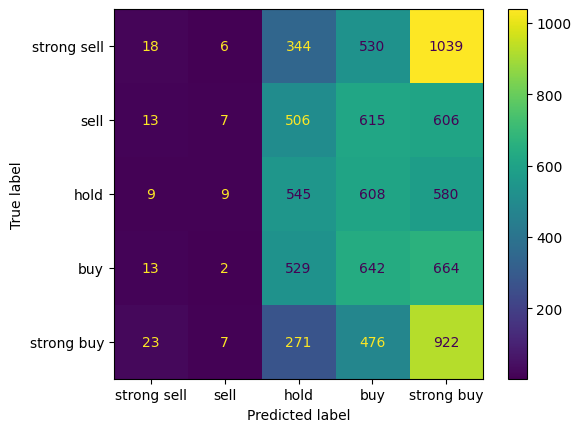

In [70]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
# labels = ['sell', 'hold', 'buy']
labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [71]:
## predict on indiv stocks
## selectKbest only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = selector.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

SNPS: 26.51
MRNA: 21.29
BKNG: 24.5
ABNB: 21.29
INTU: 19.28
CDNS: 24.5
TEAM: 24.9
CRWD: 25.4
MSFT: 21.77
PANW: 22.58
MELI: 22.98
TTD: 19.76
MDB: 20.56
NVDA: 20.56
META: 24.6
AMAT: 25.81
AMD: 22.58
DASH: 22.18
AMZN: 22.18
CPRT: 25.0
PDD: 23.39
AVGO: 25.0
INTC: 22.58
LRCX: 27.82
MU: 25.0
WDAY: 27.42
DDOG: 24.6
ZS: 23.39
ADBE: 22.18
MRVL: 25.81
SMCI: 24.19
TSLA: 22.58
III.L: 20.17
MKS.L: 24.5
RR.L: 22.77


# training mtd 3 - using PCA(0.95)

In [73]:
features = df.columns[8:-4]
print(len(features))
target = "Target"

X_train = train_df[features].to_numpy()
y_train = train_df[target].to_numpy()
print(X_train.shape,y_train.shape)

X_val = val_df[features].to_numpy()
y_val = val_df[target].to_numpy()
print(X_val.shape,y_val.shape)

X_test = test_df[features].to_numpy()
y_test = test_df[target].to_numpy()
print(X_test.shape,y_test.shape)

72
(71867, 72) (71867,)
(8983, 72) (8983,)
(8984, 72) (8984,)


In [74]:
set(y_train),set(y_val),set(y_test)

({0, 1, 2, 3, 4}, {0, 1, 2, 3, 4}, {0, 1, 2, 3, 4})

In [75]:
from imblearn.over_sampling import SMOTE

def balance_dataset_with_smote(X, y):
    # Initialize the SMOTE object
    smote = SMOTE(sampling_strategy='auto', random_state=42)
    
    # Apply SMOTE to the dataset
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return X_resampled, y_resampled

In [76]:
def get_numpy_value_counts(arr):
    unique, counts = np.unique(arr, return_counts=True)
    print(np.asarray((unique, counts)).T)

In [77]:
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)
X_train, y_train = balance_dataset_with_smote(X_train, y_train)
print(X_train.shape,y_train.shape)
get_numpy_value_counts(y_train)

(71867, 72) (71867,)
[[    0 14326]
 [    1 14374]
 [    2 14262]
 [    3 14346]
 [    4 14559]]
(72795, 72) (72795,)
[[    0 14559]
 [    1 14559]
 [    2 14559]
 [    3 14559]
 [    4 14559]]


In [78]:
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)
X_val, y_val = balance_dataset_with_smote(X_val, y_val)
print(X_val.shape,y_val.shape)
get_numpy_value_counts(y_val)

(8983, 72) (8983,)
[[   0 1731]
 [   1 1839]
 [   2 1947]
 [   3 1764]
 [   4 1702]]
(9735, 72) (9735,)
[[   0 1947]
 [   1 1947]
 [   2 1947]
 [   3 1947]
 [   4 1947]]


In [79]:
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)
# X_test, y_test = balance_dataset_with_smote(X_test, y_test)
# print(X_test.shape,y_test.shape)
# get_numpy_value_counts(y_test)

In [80]:
from scripts.train_predict import *

# standardise the values and selectKbest
scaler = StandardScaler()
pca = PCA(n_components = 0.95)

# Fit the scaler on the training data and transform the training data
X_train = scaler.fit_transform(X_train)
X_train = pca.fit_transform(X_train)

# Transform the validation data
X_val = scaler.transform(X_val)
X_val = pca.transform(X_val)

# Transform the test data
X_test = scaler.transform(X_test)
X_test = pca.transform(X_test)

X_train.shape,y_train.shape,X_val.shape,y_val.shape,X_test.shape,y_test.shape

((72795, 26), (72795,), (9735, 26), (9735,), (8984, 26), (8984,))

In [81]:
X_train[0],y_train[0]

(array([ 5.04346114e+00, -2.25298435e+00,  8.31843852e-01, -1.83646997e+00,
        -1.53720655e-01, -5.64514868e-01,  2.65242246e+00, -3.54762489e-01,
         3.91726099e-03,  3.40345088e-02,  2.66208760e-03, -2.25975395e-02,
        -3.94477521e-02,  2.32141932e-02, -4.96153953e-02,  7.31271216e-03,
         1.01210815e+00,  9.20532463e-01, -2.95396686e-01, -8.87713870e-01,
        -9.89633228e-02,  1.26431304e-03, -1.57839485e-01,  4.71183733e-01,
         3.43779309e-01, -6.17065482e-01]),
 3)

In [82]:
from sklearn.metrics import accuracy_score

def train():
    # initialise training params
    best_score = float('inf')
    best_params = None
    best_model = None
    

    # Define the parameter grid
    param_grid = {
        # 'hidden_layer_sizes': [(8,), (16,), (32,), (64,), (64,8), (64,16,), (32,8), (16,8), (8,16,), (8,64,)], # Different architectures
        # 'activation': ['relu', 'tanh'], # Different activation functions
        # 'solver': ['adam', 'sgd'], # Different solvers
        # 'alpha': [0.0001, 0.001], # Different regularization terms
        # 'learning_rate': ['constant', 'adaptive'], # Different learning rates
        # 'hidden_layer_sizes': [(8,64), (8,4), (8,2), (4,2),(2),(1),(4)], # Different architectures
        'hidden_layer_sizes': [(32)], # Different architectures
        # 'hidden_layer_sizes': [(6, 8, 64, 1), (64, 1)], # Different architectures
        # 'hidden_layer_sizes': [(8,64), (16,64), (32,64), (32, 128)], # Different architectures
        'activation': ['relu'], # Different activation functions
        'solver': ['adam'], # Different solvers
        'alpha': [0.0005], # Different regularization terms
        'learning_rate': ['adaptive'], # Different learning rates
    }

    for params in alive_it(ParameterGrid(param_grid)):
        model = MLPClassifier(max_iter=1000, **params) # initialise new model before each run
        model.fit(X_train, y_train)
        y_pred = model.predict(X_val)
        # score = model.score(y_val, y_pred)
        score,y_pred = predict(model,X_val,y_val)
        
        if score < best_score:
            best_score = score
            best_params = params
            best_model = model
            print(f"score: {round(best_score,7)}")
            # print(f"score: {round(best_score,7)}, params: {best_params}")

    print(f"Best parameters found: {best_params}")
    print(f"Best validation score: {round(best_score,5)}")

    return best_model, best_params, best_score, X_test, y_test

def predict(best_model, X_test, y_test):
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    
    return acc,y_pred

def train_predict():
    best_model, best_params, best_score, X_test, y_test = train()
    acc,y_pred = predict(best_model, X_test, y_test)
    
    return best_model, best_params, best_score, acc, y_pred

In [83]:
best_model, best_params, best_score, acc, y_pred = train_predict()

on 0: score: 0.2585516
|████████████████████████████████████████| 1/1 [100%] in 4.1s (0.24/s) 
Best parameters found: {'activation': 'relu', 'alpha': 0.0005, 'hidden_layer_sizes': 32, 'learning_rate': 'adaptive', 'solver': 'adam'}
Best validation score: 0.25855


accuracy: 23.71


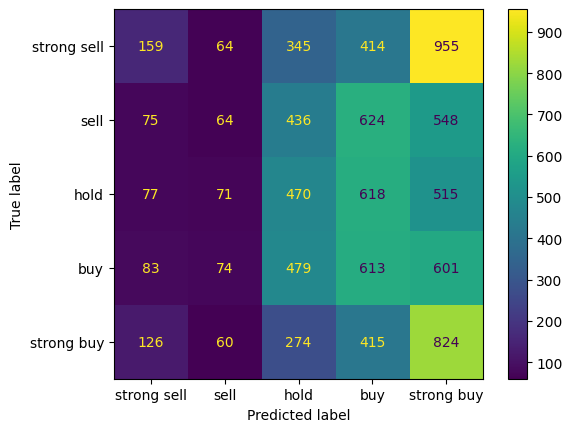

In [84]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

print(f"accuracy: {round(acc*100,2)}")
# labels = ['sell', 'hold', 'buy']
labels = ['strong sell', 'sell', 'hold', 'buy', 'strong buy']
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)
disp.plot()
plt.show()

In [85]:
## predict on indiv stocks
## pca transformed features only

for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

SNPS: 20.88
MRNA: 24.1
BKNG: 21.29
ABNB: 15.26
INTU: 22.89
CDNS: 22.89
TEAM: 24.5
CRWD: 19.35
MSFT: 18.55
PANW: 20.56
MELI: 19.76
TTD: 23.39
MDB: 20.56
NVDA: 21.37
META: 24.19
AMAT: 22.18
AMD: 22.98
DASH: 22.18
AMZN: 19.76
CPRT: 22.58
PDD: 22.98
AVGO: 24.6
INTC: 25.0
LRCX: 16.94
MU: 23.39
WDAY: 21.37
DDOG: 21.77
ZS: 16.53
ADBE: 18.55
MRVL: 23.79
SMCI: 19.35
TSLA: 20.16
III.L: 21.33
MKS.L: 20.46
RR.L: 19.6


# use model to predict on individual stocks

In [60]:
best_model

MLPClassifier(alpha=0.0005, hidden_layer_sizes=32, learning_rate='adaptive',
              max_iter=1000)

In [61]:
for stock_name in test_df.stock_name.unique():
    stock_df = test_df[test_df['stock_name']==stock_name]
    stock_X_test = stock_df[features].to_numpy()
    stock_y_test = stock_df[target].to_numpy()
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_X_test = pca.transform(stock_X_test)
    # print(stock_X_test.shape,stock_y_test.shape)

    stock_preds = best_model.predict(stock_X_test)
    acc = accuracy_score(stock_y_test, stock_preds)

    print(f"{stock_name}: {round(acc*100,2)}")

TSLA: 36.14
MDB: 34.14
MU: 33.73
ADBE: 34.94
TTD: 33.33
PDD: 34.54
META: 36.14
WDAY: 35.89
CRWD: 35.08
SMCI: 34.27
ZS: 34.27
NVDA: 31.05
AMZN: 29.44
TEAM: 37.9
AMAT: 35.48
MRNA: 34.68
DDOG: 29.44
INTC: 36.29
PANW: 34.68
CPRT: 33.47
INTU: 30.65
BKNG: 31.05
SNPS: 39.92
ABNB: 39.11
AVGO: 37.5
AMD: 32.26
MSFT: 33.06
MELI: 36.69
DASH: 25.4
CDNS: 36.29
LRCX: 36.69
MRVL: 33.87
III.L: 34.29
MKS.L: 33.72
RR.L: 32.56
